In [1]:
from estimark.scf import scf_data
from estimark.parameters import age_mapping
from estimark.estimation import (
    get_empirical_moments,
    get_weighted_moments,
    weighted_median,
)
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
scf_data

,age,age_group,wealth_income_ratio,weight
30,31,"(30,35]",6.697993,3676.299028
31,31,"(30,35]",6.697993,3822.532451
32,31,"(30,35]",6.697993,3779.582462
33,31,"(30,35]",6.697993,3570.089875
34,31,"(30,35]",6.697993,3803.353076
...,...,...,...,...
232510,43,"(40,45]",9.602461,6283.187315
232511,43,"(40,45]",11.444635,6639.658020
232512,43,"(40,45]",11.547022,6580.343722
232513,43,"(40,45]",10.413175,6515.081945


In [3]:
moments = get_weighted_moments(
    data=scf_data,
    variable="wealth_income_ratio",
    weights="weight",
    groups="age_group",
    mapping=age_mapping,
)

/home/alujan/micromamba/envs/estimatingmicrodsops/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7fb65411ef20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
/home/alujan/micromamba/envs/estimatingmicrodsops/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7fb65411ef20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
/home/alujan/micromamba/envs/estimatingmicrodsops/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7fb65411ef20> is currently usin

In [4]:
moments

{'(25,30]': array([0.65763249]),
 '(30,35]': array([0.97360885]),
 '(35,40]': array([1.78172387]),
 '(40,45]': array([2.38910063]),
 '(45,50]': array([3.23681528]),
 '(50,55]': array([4.24488131]),
 '(55,60]': array([5.32876747]),
 '(70,75]': array([8.80298421]),
 '(75,80]': array([9.85313601]),
 '(80,85]': array([8.75530344]),
 '(85,90]': array([11.36179422]),
 '(90,95]': array([9.9756071])}

([<matplotlib.axis.XTick at 0x7fb5524c86b0>,
 [Text(0, 0, '(25,30]'),
  Text(1, 0, '(30,35]'),
  Text(2, 0, '(35,40]'),
  Text(3, 0, '(40,45]'),
  Text(4, 0, '(45,50]'),
  Text(5, 0, '(50,55]'),
  Text(6, 0, '(55,60]'),
  Text(7, 0, '(70,75]'),
  Text(8, 0, '(75,80]'),
  Text(9, 0, '(80,85]'),
  Text(10, 0, '(85,90]'),
  Text(11, 0, '(90,95]')])

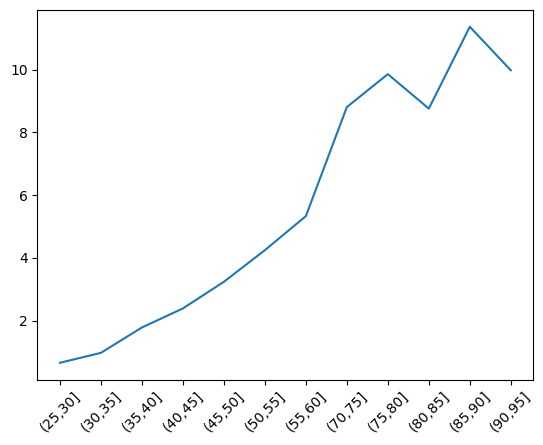

In [5]:
plt.plot(moments.values())
plt.xticks(range(len(moments)), moments.keys(), rotation=45)

In [6]:
from estimark.snp import snp_data

In [7]:
snp_data

,age,share,age_group
51,71,0.393936,"(70,75]"
52,72,0.382074,"(70,75]"
53,73,0.370212,"(70,75]"
54,74,0.363326,"(70,75]"
55,75,0.356440,"(70,75]"
56,76,0.349554,"(75,80]"
57,77,0.342668,"(75,80]"
58,78,0.335781,"(75,80]"
59,79,0.332880,"(75,80]"
60,80,0.329979,"(75,80]"


In [8]:
share_moments = get_weighted_moments(
    data=snp_data,
    variable="share",
    groups="age_group",
    mapping=age_mapping,
    weights=None,
)

([<matplotlib.axis.XTick at 0x7fb552537290>,
 [Text(0, 0, '(70,75]'),
  Text(1, 0, '(75,80]'),
  Text(2, 0, '(80,85]'),
  Text(3, 0, '(85,90]'),
  Text(4, 0, '(90,95]')])

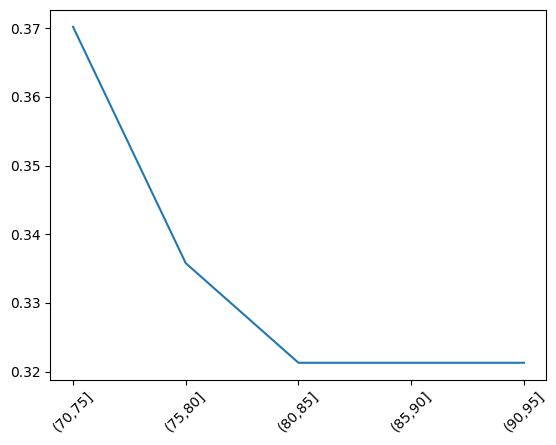

In [9]:
plt.plot(share_moments.values())
plt.xticks(range(len(share_moments)), share_moments.keys(), rotation=45)